# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [142]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import tweepy
import os
import numpy as np
import json
import matplotlib.pyplot as plt

In [143]:
# Read twitter-archive-enhanced.csv
wrd=pd.read_csv('twitter-archive-enhanced.csv')
wrd.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [144]:
ip=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
ip
with open('image_predictions.tsv',mode='wb') as file:
    file.write(ip.content)
# Reading the TSV file and converting it into a data frame
image=pd.read_csv('image_predictions.tsv',sep='\t')
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [188]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'E4w4BL09TmX9dn9QPQsP4PKmh'
consumer_secret = 'Ul1g51VF2VFPIYEjuvRIlQercUJs3S9O7BDTiUz2sB5szEw3eN'
access_token = '1714187013489049600-fXdKsOZfZCHLPPkMliugTNIaqnYInR'
access_secret = '0z4jB1gLVdalb6aePKCFjGYUnxFjtJxRC9iFIk8mwcQBL'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# list of tweet ids from enhanced data set
df_tweet_ids = wrd['tweet_id']

# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id)._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted    
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                         })
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)

df=pd.DataFrame(df_tweets,columns=['tweet_id', 'favorites', 'retweets'])
df.to_csv('tweet_json1.txt',encoding = 'utf-8', index=False)



892420643555336193 _ [{'message': 'You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product', 'code': 453}]
892177421306343426 _ [{'message': 'You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product', 'code': 453}]
891815181378084864 _ [{'message': 'You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product', 'code': 453}]
891689557279858688 _ [{'mess

KeyboardInterrupt: 

> Due to API endpoint restriction i couldnot access these data, hence i proceeded with the txt file provided by Udacity team

In [145]:
# Read the json text file and create a list of dictionary 

obj_list = []
with open('tweet_json.txt') as f:
  for line in f:
    obj_list.append(json.loads(line))


In [146]:
# convert list to dataframe
df_tweets_json = pd.DataFrame(obj_list, columns = ['id', 'retweet_count', 'favorite_count'])
df_tweets_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [147]:
df_tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [148]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [149]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [150]:
df_tweets_json.sample(10)

,id,retweet_count,favorite_count
1357,703356393781329922,429,2085
2212,668544745690562560,250,561
1905,674447403907457024,393,1137
1778,677700003327029250,1622,3689
1266,709556954897764353,1204,3593
855,763956972077010945,61,812
438,819952236453363712,1369,5927
2171,669324657376567296,223,525
243,846042936437604353,3224,17256
594,798701998996647937,9126,0


In [151]:
wrd.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None
1443,696744641916489729,NaN,NaN,2016-02-08 17:17:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Klevin. He doesn't want his family bra...,NaN,NaN,NaN,https://vine.co/v/i1wrljBUjAu,10,10,Klevin,None,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,None,None,None
1102,735274964362878976,NaN,NaN,2016-05-25 01:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in your...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735274964...,11,10,None,None,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,one,None,None,None,None
1544,689517482558820352,NaN,NaN,2016-01-19 18:39:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He just wants to make sure you'r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689517482...,12,10,Carl,None,None,None,None
1386,700518061187723268,NaN,NaN,2016-02-19 03:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vincent. He's the man your girl is wit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700518061...,10,10,Vincent,None,None,None,None
991,748699167502000129,NaN,NaN,2016-07-01 02:06:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tripp. He's being eaten by a sherk and do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748699167...,11,10,Tripp,None,None,None,None
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo


In [152]:
wrd[wrd['name'].str.len()<=2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


There are invalid names like a,an,o

In [153]:
image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1125,727314416056803329,https://pbs.twimg.com/media/Chfwmd9U4AQTf1b.jpg,2,toy_poodle,0.827469,True,miniature_poodle,0.160760,True,Tibetan_terrier,0.001731,True
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.355060,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.099884,True
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
1787,829501995190984704,https://pbs.twimg.com/media/C4L7p19W8AA3Fs_.jpg,1,French_bulldog,0.950851,True,Pekinese,0.015200,True,pug,0.011094,True
1179,738156290900254721,https://pbs.twimg.com/media/Cj51Oj3VAAEVe4O.jpg,1,pug,0.751758,True,tub,0.110748,False,bathtub,0.104132,False
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1043,712668654853337088,https://pbs.twimg.com/media/CePoVTyWsAQEz1g.jpg,1,Labrador_retriever,0.829058,True,golden_retriever,0.038664,True,Chihuahua,0.026221,True
1169,736010884653420544,https://pbs.twimg.com/media/CjbV-lEWgAAr6WY.jpg,2,golden_retriever,0.553901,True,Labrador_retriever,0.119475,True,bluetick,0.077475,True
1456,777641927919427584,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,Pomeranian,0.993718,True,Pekinese,0.003611,True,Persian_cat,0.000525,False


In [154]:
image['total_prob']=image['p1_conf']+image['p2_conf']+image['p3_conf']
image['total_prob'].value_counts().sort_index(ascending=False).head(5)

1.000000    1
0.999999    1
0.999999    1
0.999999    1
0.999998    1
Name: total_prob, dtype: int64

In [155]:
wrd.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [156]:
wrd.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

rating numerator and denominator has invalid values

In [157]:
sum(wrd.duplicated())

0

In [158]:
wrd[wrd.in_reply_to_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


### Quality issues
#### wrd (twitter-archive-enhanced) dataset
1.timestamp,retweeted_status_timestamp is an object datatype instead of datetime

2.Drop unnecessary columns in wrd dataset

3.In several columns null objects are non-null (None to NaN).

4.tweet_id,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be object instead of float. 

5.rating numerator and denominator has invalid values

6.There are invalid names like a,an,o

7.Since we want only original tweet, no need to have retweets and reply


#### image dataset
8.Change tweet_id to an object datatype

9.Give a proper name to columns.Change the name of p1,p2,p3,p1_conf,p1_dog

### Tidiness issues
1.No need to have 4 different columns to indicate dog stage

2.Combine the datasets together.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [159]:
# Make copies of original pieces of data
wrd_copy=wrd.copy()
image_copy=image.copy()
df_tweets_json_copy=df_tweets_json.copy()

### Issue #1:

#### Define : Remove 1 letter names and make them as NaN

#### code:

In [160]:
for x in range(0,len(wrd_copy.name)):
    if len(wrd_copy.name[x])<=1:
       wrd_copy.name[x]=np.nan
 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Test:

In [161]:
wrd_copy[wrd_copy['name'].str.len()<=1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:

#### Define Data type of Timestamp is not Datetime.change that

#### Code

In [162]:
wrd_copy['timestamp']=pd.to_datetime(wrd_copy['timestamp'])

#### Test

In [163]:
wrd_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2300 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue 3:

#### Define:Convert 4 stages of dog into one column and drop the rest

#### Code:

In [164]:
drop=['doggo','floofer','pupper','puppo']
stay=[x for x in wrd_copy.columns.tolist() if x not in drop]

wrd_cleaned=pd.melt(wrd_copy,id_vars=stay,value_vars=drop,var_name='drop',value_name='stage')


#drop the 'drop' column
wrd_cleaned=wrd_cleaned.drop('drop',1)


#### Test:

In [165]:
wrd_cleaned.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
5640,754747087846248448,NaN,NaN,2016-07-17 18:38:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's pursuing a more 2D lifesty...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754747087...,12,10,Keith,None
7586,810657578271330305,NaN,NaN,2016-12-19 01:26:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Pavlov. His floatation device has fail...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810657578...,11,10,Pavlov,None
1294,707995814724026368,NaN,NaN,2016-03-10 18:25:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Farfle. He lost his back legs during t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707995814...,12,10,Farfle,None
8563,692535307825213440,NaN,NaN,2016-01-28 02:30:58,"<a href=""http://twitter.com/download/iphone"" r...",This is Amber. She's a Fetty Woof. 10/10 would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692535307...,10,10,Amber,None
9419,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None


### Issue 4 
#### Define: convert None to NaN

#### Code

In [166]:

wrd_cleaned.stage = wrd_cleaned.stage.replace('None',np.nan)
wrd_cleaned.name = wrd_cleaned.name.replace('None',np.nan)
wrd_cleaned.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
3399,743835915802583040,NaN,NaN,2016-06-17 16:01:16,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,NaN,NaN
6421,680609293079592961,NaN,NaN,2015-12-26 04:41:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. That is his chair. He loves his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680609293...,9,10,Brody,NaN
3480,730211855403241472,NaN,NaN,2016-05-11 01:44:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Ziva. She doesn't know how her collar ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730211855...,11,10,Ziva,NaN
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,NaN,NaN
5318,798340744599797760,NaN,NaN,2016-11-15 01:44:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Davey. He'll have your ...,7.717705e+17,4.196984e+09,2016-09-02 18:03:10 +0000,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,NaN


#### Test:

In [167]:
wrd_cleaned.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
869,761745352076779520,NaN,NaN,2016-08-06 02:06:59,"<a href=""http://twitter.com/download/iphone"" r...",Guys.. we only rate dogs. Pls don't send any m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761745352...,11,10,NaN,NaN
3084,782021823840026624,NaN,NaN,2016-10-01 00:58:26,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Harper. She scraped her...,7.076109e+17,4.196984e+09,2016-03-09 16:56:11 +0000,https://twitter.com/dog_rates/status/707610948...,12,10,Harper,NaN
6106,700002074055016451,NaN,NaN,2016-02-17 17:01:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He covered himself in nanners ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700002074...,9,10,Thumas,NaN
6101,700167517596164096,NaN,NaN,2016-02-18 03:58:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Dotsy. She's stuck as hell. 10/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700167517...,10,10,Dotsy,NaN
440,819924195358416896,NaN,NaN,2017-01-13 15:08:56,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a doggo who has messed up. He was...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819924195...,11,10,NaN,doggo


### Issue 5
#### Define : Numerators and denominators have invalid value. normalise them

#### Code:

In [168]:

wrd_cleaned['normalised_rating'] = np.where(wrd_cleaned['rating_denominator'] != 0, wrd_cleaned['rating_numerator'] / wrd_cleaned['rating_denominator'], np.nan)


#### Test

In [169]:
wrd_cleaned.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,normalised_rating
175,857989990357356544,NaN,NaN,2017-04-28 16:08:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She was just informed of the wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857989990...,12,10,Rosie,NaN,1.2
505,812781120811126785,NaN,NaN,2016-12-24 22:04:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Swagger. He's the Cleveland Browns amb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812781120...,10,10,Swagger,NaN,1.0
1065,740711788199743490,NaN,NaN,2016-06-09 01:07:06,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing the touchdown of a pupn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740711788...,9,10,NaN,NaN,0.9
6119,699079609774645248,NaN,NaN,2016-02-15 03:55:41,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699079609...,8,10,Reagan,NaN,0.8
9311,667902449697558528,NaN,NaN,2015-11-21 03:08:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Cleopatricia. She is a northern Paperb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667902449...,9,10,Cleopatricia,NaN,0.9


In [170]:
wrd_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 15 columns):
tweet_id                      9424 non-null int64
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null datetime64[ns]
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          6220 non-null object
stage                         394 non-null object
normalised_rating             9420 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(6)
memory usage: 1.1+ MB


### Issue 6


#### Define:Remove retweets and replies in wrd dataset

#### Code

In [171]:
# Remove the retweets
wrd_cleaned = wrd_cleaned[wrd_cleaned.retweeted_status_id.isnull()]
# Remove the replies
wrd_cleaned = wrd_cleaned[wrd_cleaned.in_reply_to_status_id.isnull()]

#### Test

In [172]:
wrd_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 9423
Data columns (total 15 columns):
tweet_id                      8388 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     8388 non-null datetime64[ns]
source                        8388 non-null object
text                          8388 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 8376 non-null object
rating_numerator              8388 non-null int64
rating_denominator            8388 non-null int64
name                          5752 non-null object
stage                         347 non-null object
normalised_rating             8388 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(6)
memory usage: 1.0+ MB


### Issue 7
#### Define: Merge data frames


#### Code:

In [191]:
df_merge = pd.merge(left=wrd_cleaned,right=df_tweets_json_copy, left_on='tweet_id', right_on='id', how='inner')
df_merged=pd.merge(left=df_merge,right=image_copy,left_on='tweet_id',right_on='tweet_id',how='inner')

#### Test

In [192]:
df_merged.drop_duplicates(inplace=True)
df_merged.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_prob
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,0.259010
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.483184
8,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.825644
12,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0.379200
16,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.956701


### Issue 8
#### Define: drop unwanted columns

#### Code:

In [193]:
df_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'normalised_rating', 'id',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'total_prob'],
      dtype='object')

In [194]:
df_merged.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','id','img_num', 'source'],inplace=True)

#### Test 

In [196]:
df_merged.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,normalised_rating,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_prob
7352,668484198282485761,2015-11-22 17:40:27,Good teamwork between these dogs. One is on lo...,https://twitter.com/dog_rates/status/668484198...,9,10,NaN,NaN,0.9,253,...,standard_poodle,0.587372,True,Bedlington_terrier,0.182411,True,Afghan_hound,0.040968,True,0.810751
3646,717790033953034240,2016-04-06 19:04:14,Here's a badass mystery pupper. You weren't aw...,https://twitter.com/dog_rates/status/717790033...,10,10,NaN,pupper,1.0,1272,...,car_mirror,0.819106,False,minibus,0.107383,False,cab,0.034846,False,0.961335
5488,680070545539371008,2015-12-24 17:00:27,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,NaN,0.9,994,...,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False,0.367332
1000,832273440279240704,2017-02-16 17:00:25,Say hello to Smiley. He's a blind therapy dogg...,https://twitter.com/dog_rates/status/832273440...,14,10,Smiley,doggo,1.4,2673,...,Pembroke,0.134081,True,ice_bear,0.051928,False,pug,0.044311,True,0.230320
3668,716791146589110272,2016-04-04 00:55:01,Meet Jennifur. She's supposed to be navigating...,https://twitter.com/dog_rates/status/716791146...,11,10,Jennifur,NaN,1.1,1474,...,Pomeranian,0.468751,True,seat_belt,0.154652,False,golden_retriever,0.125017,True,0.748420


### Issue 9
#### Define: Rename columns 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog', 'total_prob'.give it a meaningful name

#### Code

In [197]:
df_merged.rename(columns={'p1': 'Prediction1', 'p2': 'Prediction2', 'p3': 'Prediction3',
                          'p1_conf': 'Prediction1_probability', 'p1_dog': 'Prediction1_dog'}, inplace=True)
df_merged.rename(columns={'p2_conf': 'Prediction2_probability', 'p2_dog': 'Prediction2_dog'}, inplace=True)
df_merged.rename(columns={'p3_conf': 'Prediction3_probability', 'p3_dog': 'Prediction3_dog','total_prob':'total_probability'}, inplace=True)


#### Test

In [198]:
df_merged.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,normalised_rating,retweet_count,...,Prediction1,Prediction1_probability,Prediction1_dog,Prediction2,Prediction2_probability,Prediction2_dog,Prediction3,Prediction3_probability,Prediction3_dog,total_probability
5326,681891461017812993,2015-12-29 17:36:07,Say hello to Charlie. He's scholarly af. Quite...,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,pupper,1.0,951,...,Chihuahua,0.203570,True,doormat,0.134316,False,toy_terrier,0.084482,True,0.422368
6534,672254177670729728,2015-12-03 03:21:00,This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,pupper,1.1,800,...,pug,0.979487,True,French_bulldog,0.016850,True,Norwegian_elkhound,0.001618,True,0.997955
1856,793165685325201412,2016-10-31 19:00:10,This is Benji. He's Air Bud. It's a low effort...,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,NaN,1.2,3238,...,golden_retriever,0.946224,True,Labrador_retriever,0.036477,True,doormat,0.002353,False,0.985053
609,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,floofer,1.1,3433,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,0.663977
3356,732375214819057664,2016-05-17 01:00:32,This is Kyle (pronounced 'Mitch'). He strives ...,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,1.1,2838,...,tennis_ball,0.998673,False,basset,0.000547,True,golden_retriever,0.000360,True,0.999580


### Issue 10
#### Define: convert tweet_id's data type to string fron int64

#### Code

In [199]:
df_merged['tweet_id'] = df_merged['tweet_id'].astype('str')

#### Test

In [200]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 7880
Data columns (total 22 columns):
tweet_id                   2284 non-null object
timestamp                  2284 non-null datetime64[ns]
text                       2284 non-null object
expanded_urls              2284 non-null object
rating_numerator           2284 non-null int64
rating_denominator         2284 non-null int64
name                       1581 non-null object
stage                      313 non-null object
normalised_rating          2284 non-null float64
retweet_count              2284 non-null int64
favorite_count             2284 non-null int64
jpg_url                    2284 non-null object
Prediction1                2284 non-null object
Prediction1_probability    2284 non-null float64
Prediction1_dog            2284 non-null bool
Prediction2                2284 non-null object
Prediction2_probability    2284 non-null float64
Prediction2_dog            2284 non-null bool
Prediction3                

In [201]:
df_merged.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,normalised_rating,retweet_count,...,Prediction1,Prediction1_probability,Prediction1_dog,Prediction2,Prediction2_probability,Prediction2_dog,Prediction3,Prediction3_probability,Prediction3_dog,total_probability
4008,707693576495472641,2016-03-09 22:24:31,This is Jiminus. He's in a tub for some reason...,https://twitter.com/dog_rates/status/707693576...,7,10,Jiminus,NaN,0.7,1133,...,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False,0.996837
4934,687818504314159109,2016-01-15 02:08:05,With great pupper comes great responsibility. ...,https://twitter.com/dog_rates/status/687818504...,12,10,NaN,pupper,1.2,1080,...,Lakeland_terrier,0.873029,True,soft-coated_wheaten_terrier,0.060924,True,toy_poodle,0.017031,True,0.950984
5612,678740035362037760,2015-12-21 00:53:29,Meet Tango. He's a large dog. Doesn't care muc...,https://twitter.com/dog_rates/status/678740035...,6,10,Tango,NaN,0.6,1926,...,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True,0.855428
1504,812466873996607488,2016-12-24 01:16:12,This is Mary. She's desperately trying to recr...,https://twitter.com/dog_rates/status/812466873...,12,10,Mary,NaN,1.2,2231,...,bath_towel,0.099804,False,pillow,0.092318,False,Great_Dane,0.078205,True,0.270327
172,882762694511734784,2017-07-06 00:46:41,This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,NaN,1.2,5134,...,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True,0.939886


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [202]:
df_merged.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.Golden Retriever is the most commonly predicted followed by labrador retriever

2.There are 761 entries where the total calculated probability of being correct is greater than 95% 

3.Of all the dog life stage available, most of the dogs are in the pupper zone

In [203]:
df_merged.Prediction1.value_counts()

golden_retriever             173
Labrador_retriever           109
Pembroke                     101
Chihuahua                     85
pug                           62
Pomeranian                    47
Samoyed                       46
chow                          44
toy_poodle                    42
malamute                      32
cocker_spaniel                32
French_bulldog                29
German_shepherd               27
Chesapeake_Bay_retriever      25
miniature_pinscher            24
seat_belt                     24
Eskimo_dog                    23
Siberian_husky                23
Staffordshire_bullterrier     22
Shetland_sheepdog             21
Lakeland_terrier              21
Maltese_dog                   20
teddy                         20
Cardigan                      19
Shih-Tzu                      18
Rottweiler                    18
beagle                        18
Italian_greyhound             18
web_site                      17
kuvasz                        17
          

### Golden Retriever is the most commonly predicted followed by labrador retriever

### Visualization

Text(0.5,1,'Histogram of Total Probability')

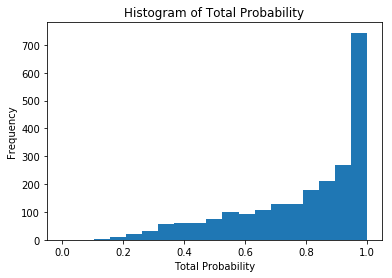

In [204]:
bins=np.linspace(0,1,20)
df_merged.total_probability.plot(kind='hist',bins=bins)
plt.xlabel('Total Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Total Probability')

In [205]:
df_merged.total_probability[df_merged.total_probability>=0.95].count()

729

### There are 761 entries where the total calculated probability of being correct is greater than 95% 

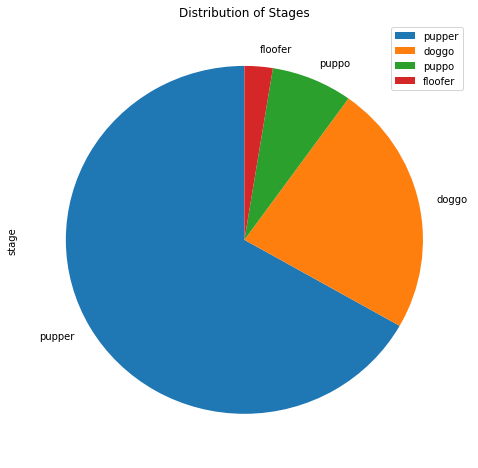

In [206]:

df_merged.stage.value_counts().plot(kind='pie', startangle=90, figsize=(8,8), title="Distribution of Stages", labels=df_merged.stage.value_counts().index)
plt.legend()

### Of all the dog life stage available, most of the dogs are in the pupper zone